In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import os
import numpy as np
import pandas as pd
import sqlalchemy as sa
sys.path.append(os.path.abspath(os.path.join('..','..','..')))
from pudl import init, mcoe, analysis, settings, outputs
import pudl.constants as pc
import pudl.extract.ferc1

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [5]:
# For some reason these things don't stick if they're in the same cell as the
# %matplotlib inline call above, but if they're separate, they work fine.
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.dpi'] = 150
pd.options.display.max_columns = 56

In [6]:
# Keeping this part separate from the function call, since it can be time consuming if we are
# re-calculating the MCOE dataset over and over again.
pudl_out = pudl.outputs.PudlOutput(freq='MS')
eia_df=pudl_out.mcoe()

/home/zane/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


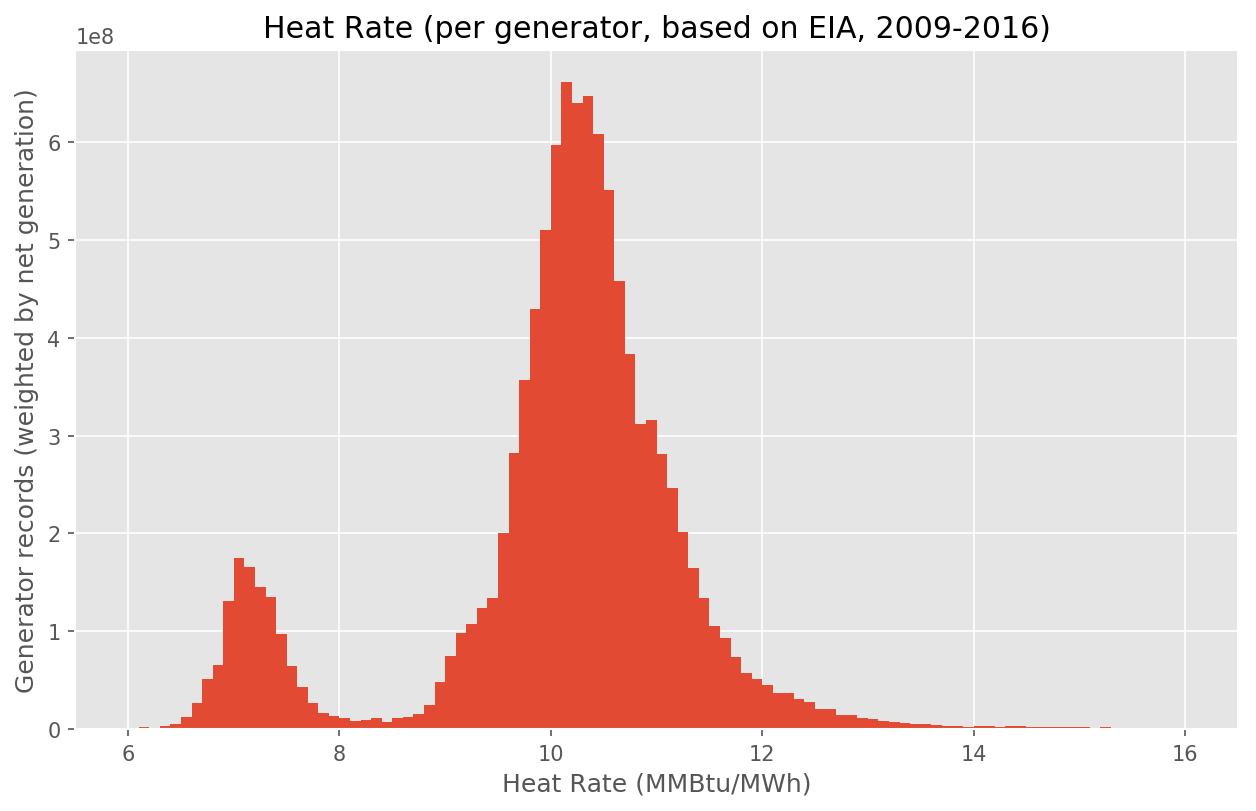

In [7]:
# Take a look at heat rates from EIA
plt.hist(eia_df.heat_rate_mmbtu_mwh,
         range=[6,16], bins=100,
         weights=eia_df.net_generation_mwh)
#heat_rate['heat_rate_mmbtu_mwh'].plot(kind='hist', bins=100, range=[-20,70])
plt.xlabel('Heat Rate (MMBtu/MWh)')
plt.ylabel("Generator records (weighted by net generation)")
plt.title("Heat Rate (per generator, based on EIA, 2009-2016)")
plt.show()

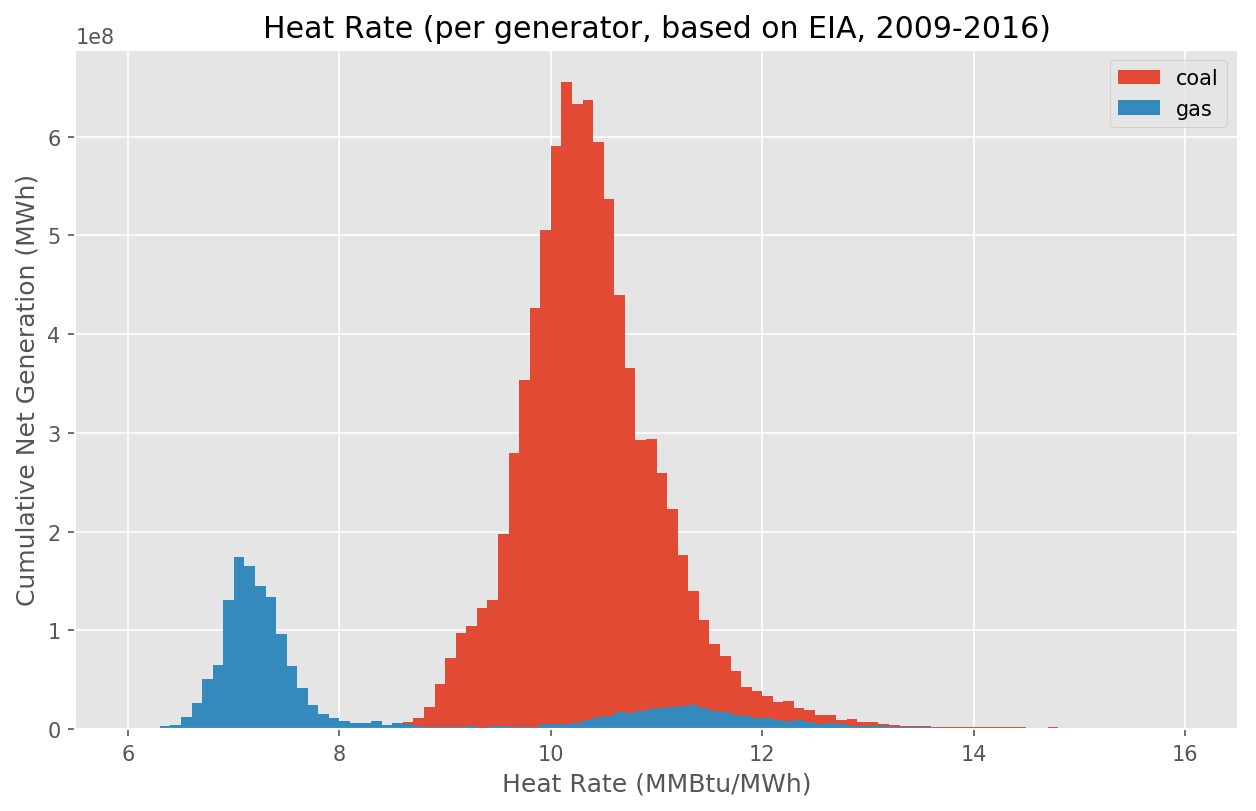

In [14]:
# Take a look at heat rates from EIA
coal_df = eia_df[eia_df.fuel_type_pudl=='coal']
gas_df = eia_df[eia_df.fuel_type_pudl=='gas']
plt.hist(coal_df.heat_rate_mmbtu_mwh,
         range=[6,16], bins=100, label='coal',
         weights=coal_df.net_generation_mwh)
plt.hist(gas_df.heat_rate_mmbtu_mwh,
         range=[6,16], bins=100, label='gas',
         weights=gas_df.net_generation_mwh)
#heat_rate['heat_rate_mmbtu_mwh'].plot(kind='hist', bins=100, range=[-20,70])
plt.xlabel('Heat Rate (MMBtu/MWh)')
plt.ylabel("Cumulative Net Generation (MWh)")
plt.title("Heat Rate (per generator, based on EIA, 2009-2016)")
plt.legend()
plt.show()

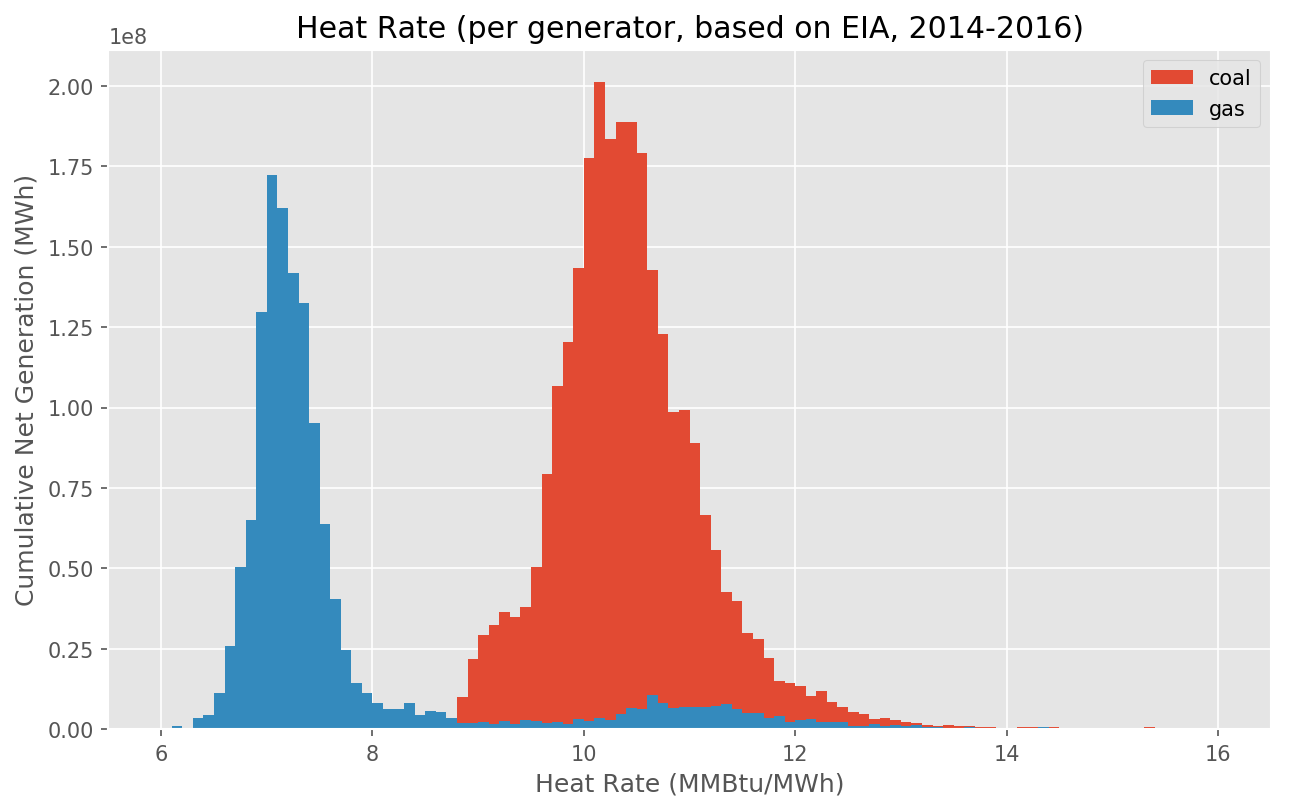

In [29]:
years=[2014,2015,2016]
# Take a look at heat rates from EIA
coal_df = eia_df[eia_df.fuel_type_pudl=='coal']
gas_df = eia_df[eia_df.fuel_type_pudl=='gas']
plt.hist(coal_df[coal_df.report_date.dt.year.isin(years)].heat_rate_mmbtu_mwh,
         range=[6,16], bins=100, label='coal',
         weights=coal_df[coal_df.report_date.dt.year.isin(years)].net_generation_mwh)
plt.hist(gas_df[gas_df.report_date.dt.year.isin(years)].heat_rate_mmbtu_mwh,
         range=[6,16], bins=100, label='gas',
         weights=gas_df[gas_df.report_date.dt.year.isin(years)].net_generation_mwh)
#heat_rate['heat_rate_mmbtu_mwh'].plot(kind='hist', bins=100, range=[-20,70])
plt.xlabel('Heat Rate (MMBtu/MWh)')
plt.ylabel("Cumulative Net Generation (MWh)")
if len(years)==1:
    year_string = str(years[0])
if len(years)>1:
    year_string = str(min(years))+'-'+str(max(years))
plt.title("Heat Rate (per generator, based on EIA, {})".format(year_string))
plt.legend()
plt.show()